# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json

# # Give your engine instance time to connect by implementing this delay:
import time

# Import API key
from api_keys import owkey_2

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [6]:
# Print the city count to confirm sufficient count
type(cities)

list

In [7]:
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [8]:
target_city = 'london'
units = "imperial"

params = {"q":target_city,
          "appid":owkey_2,
          "units":units
}

base_url = "http://api.openweathermap.org/data/2.5/weather"

In [9]:
# # -----------------REF-----------------REF-----------------REF-----------------
# # -----------------REF-----------------REF-----------------REF-----------------
#Run the request 
# response = requests.get(base_url, params=params)

# response.url

# # Convert to json
# city_data = response.json()

# #Print the json
# print(json.dumps(city_data, indent=4))

# city_data.keys()

# len(city_data)

# # response['coord']
# city_data['id']

In [9]:
# # ----- TEST TEST TEST TEST TEST TEST TEST TEST TEST
# # ------------SMALL LIST OF CITIES ---------- TESTING CODE---------- 
# # ------------------------------------------------------------
# Small list of cities to test API request
city_test = ["chicago", "seoul", "paris", "rome", "peanutszilla", 'new york', "houston", "portland"]
city_df_test= []
# city_df_test= {}

In [18]:
# # # --------------------TEST ---LIST WORKS WORKS WORKS WORKS ---------------------
# x = 0
# print(f'Print log of each city as its being processed with the city number and city name.')
      
# for city in city_test:
#     response_1 = requests.get(base_url + "?appid=" + owkey_2 + "&units=imperial&q="+ city)
#     city_df_test.append(response_1.json())
#     time.sleep(1.1)
    
#     try:
#         print(f"Processing record {x} for city query: {city}. City ID: {city_df_test[x]['id']}")
        
#     except:
#         print(f"Processing record {x} for city query: {city}. NOT FOUND IN OPEN WEATHER CITY QUERY.")
    
#     x = x+1

In [19]:
# # # ---------TEST TEST ------CONVERT LIST TO DATAFRAME---TEST TEST ---------------------
# type(city_df_test)
# city_df_test = pd.DataFrame(city_df_test)

# city_df_test.head()

In [20]:
# # # ---------TEST TEST ------CONVERT LIST TO DATAFRAME---TEST TEST ---------------------
# x = 0
# print(f'Print log of each city as its being processed with the city number and city name.')
      
# for city in city_test:
#     response_1 = requests.get(base_url + "?appid=438009f9d4c66902b74677d9e0d5247d&q="+ city)
#     df2 = response_1.json()
#     city_df_test = city_df_test.append(df2, ignore_index = True)
#     time.sleep(1.1)
    
#     try:
#         print(f"Processing record {x} for city query: {city}. City ID: {city_df_test.iloc[x,5]}")
        
#     except:
#         print(f"Processing record {x} not found")
    
#     x = x+1

In [23]:
# # city_df_test

# len(city_df_test)

# city_df_test

In [24]:
# set up lists to hold reponse info
city_df = []

In [25]:
x = 0
print(f'Print log of each city as its being processed with the city number and city name.')
      
for city in cities:
    response_1 = requests.get(base_url + "?appid=" + owkey_2 + "&units=imperial&q="+ city)
    city_df.append(response_1.json())
    time.sleep(1.1)
    
    try:
        print(f"Processing record {x} for city query: {city}. City ID: {city_df[x]['id']}")
        
    except:
        print(f"Processing record {x} for city query: {city}. NOT FOUND IN OPEN WEATHER CITY QUERY.")
    
    x = x+1

Print log of each city as its being processed with the city number and city name.
Processing record 0 for city query: clyde river. City ID: 5924351
Processing record 1 for city query: jamestown. City ID: 5122534
Processing record 2 for city query: vaitupu. NOT FOUND IN OPEN WEATHER CITY QUERY.
Processing record 3 for city query: mys shmidta. NOT FOUND IN OPEN WEATHER CITY QUERY.
Processing record 4 for city query: naini tal. City ID: 1262117
Processing record 5 for city query: hasaki. City ID: 2112802
Processing record 6 for city query: chongwe. City ID: 917688
Processing record 7 for city query: gus-zheleznyy. City ID: 557754
Processing record 8 for city query: georgetown. City ID: 1735106
Processing record 9 for city query: manadhoo. City ID: 1337618
Processing record 10 for city query: fairbanks. City ID: 5861897
Processing record 11 for city query: lazaro cardenas. City ID: 4026082
Processing record 12 for city query: rikitea. City ID: 4030556
Processing record 13 for city query: t

In [63]:
# city_df[0]['id']

# http://api.openweathermap.org/data/2.5/weather?q=london&appid=438009f9d4c66902b74677d9e0d5247d

# type(city_df)

In [165]:
# # --------REF--------REF--------REF--------REF--------
# # create cities dataframe and export to csv
# city_df = pd.DataFrame(city_df)
# cities_df.to_csv(r"output_data/cities.csv")
# cities_df

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [213]:
# set up lists to hold reponse info
weat_df ={}
weat_df = pd.DataFrame(weat_df)

In [214]:
weat_df['City'] = ""
weat_df['Longitude'] = ""
weat_df['Latitude']= ""
weat_df['MaxTemp'] = ""
weat_df['Humidity'] = ""
weat_df['Cloudiness'] = ""
weat_df['WindSpeed'] = ""
weat_df['Country'] = ""
weat_df['Date'] = ""
weat_df['CityID'] = ""

weat_df.head()

,City,Longitude,Latitude,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date,CityID


In [215]:
# Convert list into a dataframe to so that index can be shared to create weather datafrme
city_df2 = pd.DataFrame(city_df)

In [216]:
#Use new city data frame to propertly index weather dataframe
weat_df = pd.DataFrame(index=city_df2.index)

In [217]:
for index, row in weat_df.iterrows():
    try:
        weat_df.loc[index, 'City'] = city_df[index]['name']
        weat_df.loc[index, 'Longitude'] = city_df[index]["coord"]["lon"]
        weat_df.loc[index, 'Latitude']= city_df[index]["coord"]["lat"]
        weat_df.loc[index, 'MaxTemp'] = city_df[index]['main']['temp_max']
        weat_df.loc[index, 'Humidity'] = city_df[index]['main']['humidity']
        weat_df.loc[index, 'Cloudiness'] = city_df[index]['clouds']["all"]
        weat_df.loc[index, 'WindSpeed'] = city_df[index]['wind']['speed']
        weat_df.loc[index, 'Country'] = city_df[index]['sys']['country']
        weat_df.loc[index, 'Date'] = city_df[index]['dt']
        weat_df.loc[index, 'CityID'] = city_df[index]['id']

    except:
        weat_df.loc[index, 'City'] = 'NaN'

In [218]:
len(weat_df)

612

In [219]:
#Drop NaN rows that are not identified by OpenWeather
weat_df = weat_df.dropna(axis = 0, how ='any')

In [249]:
len(weat_df)

565

In [221]:
weat_df.reset_index(inplace = True)

In [64]:
weat_df.head(10)

,index,City,Longitude,Latitude,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date,CityID
0,0,Clyde River,-68.5914,70.4692,-3.77,84.0,100.0,16.11,CA,1.638131e+09,5924351.0
1,1,Jamestown,-79.2353,42.0970,36.72,100.0,90.0,9.22,US,1.638131e+09,5122534.0
2,4,Nainital,79.4469,29.3974,39.52,65.0,0.0,4.14,IN,1.638131e+09,1262117.0
3,5,Hasaki,140.8333,35.7333,34.20,48.0,2.0,0.89,JP,1.638131e+09,2112802.0
4,6,Chongwe,28.6820,-15.3292,66.88,49.0,3.0,4.29,ZM,1.638131e+09,917688.0
5,7,Gus-Zheleznyy,41.1656,55.0581,31.46,99.0,100.0,5.06,RU,1.638131e+09,557754.0
6,8,George Town,100.3354,5.4112,76.95,88.0,20.0,0.00,MY,1.638131e+09,1735106.0
7,9,Manadhoo,73.3833,5.7667,80.55,78.0,97.0,12.75,MV,1.638131e+09,1337618.0
8,10,Fairbanks,-147.7164,64.8378,-27.44,75.0,1.0,0.00,US,1.638131e+09,5861897.0
9,11,Lázaro Cárdenas,-102.2000,17.9583,84.63,55.0,4.0,10.00,MX,1.638131e+09,4026082.0


In [228]:
weat_df.describe()

,index,Longitude,Latitude,MaxTemp,Humidity,Cloudiness,WindSpeed,Date,CityID
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02,5.650000e+02
mean,306.270796,18.428403,20.055705,53.041221,73.192920,61.300885,7.614850,1.638132e+09,2.673272e+06
std,176.717667,90.620690,33.121918,29.659540,20.818618,38.622304,5.558447,2.596439e+02,1.668296e+06
min,0.000000,-179.166700,-54.800000,-39.030000,5.000000,0.000000,0.000000,1.638131e+09,5.315700e+04
25%,155.000000,-59.516700,-5.795000,35.170000,63.000000,20.000000,3.440000,1.638132e+09,1.529484e+06
50%,306.000000,23.116500,20.502200,63.550000,77.000000,75.000000,6.530000,1.638132e+09,2.206894e+06
75%,459.000000,102.279700,49.600000,76.420000,89.000000,99.000000,10.490000,1.638132e+09,3.585968e+06
max,611.000000,179.316700,78.218600,93.780000,100.000000,100.000000,36.820000,1.638132e+09,1.072286e+07


In [252]:
# Export dataframe to CSV
weat_df.to_csv(r"output_data/cities.csv")

In [9]:
#CSV file upload
weat_df_path = "output_data/cities.csv"
weat_df = pd.read_csv(weat_df_path)

In [12]:
#Remove column added from CSV upload
labels="Unnamed: 0"
weat_df.drop(columns = labels, inplace=True)

In [13]:
weat_df.head()

,index,City,Longitude,Latitude,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date,CityID
0,0,Clyde River,-68.5914,70.4692,-3.77,84.0,100.0,16.11,CA,1.638131e+09,5924351.0
1,1,Jamestown,-79.2353,42.0970,36.72,100.0,90.0,9.22,US,1.638131e+09,5122534.0
2,4,Nainital,79.4469,29.3974,39.52,65.0,0.0,4.14,IN,1.638131e+09,1262117.0
3,5,Hasaki,140.8333,35.7333,34.20,48.0,2.0,0.89,JP,1.638131e+09,2112802.0
4,6,Chongwe,28.6820,-15.3292,66.88,49.0,3.0,4.29,ZM,1.638131e+09,917688.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weat_df_100h = weat_df[weat_df['Humidity'] > 100]

In [15]:
# There are ZERO cities wher the humidity > 100%
weat_df_100h.shape

(0, 11)

In [250]:
#  Get the indices of cities that have humidity over 100%.

In [251]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
The scatter plot shows that in late November temperature generally drops as you move further north of the equator.

In [42]:
xval = weat_df.iloc[:,3]
yval = weat_df.iloc[:,4]

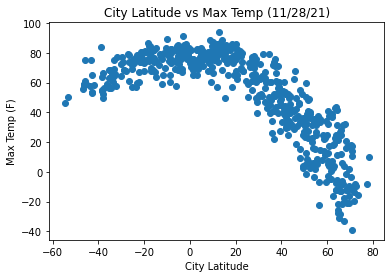

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xval, yval)
regress_values = weat_df.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weat_df.iloc[:,3],weat_df.iloc[:,4])
# plt.plot(xval,regress_values,"r-")
# plt.annotate(line_eq,(-50,-25),fontsize=15,color="red")
plt.title("City Latitude vs Max Temp (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('output_data/lat_temp.png')
plt.show()

## Latitude vs. Humidity Plot
The scatter plot shows there is no relationship between latitude and humidity, but does show humidity usually over 60% across the cities in late November.

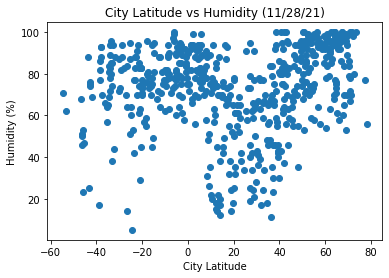

In [46]:
plt.scatter(weat_df.iloc[:,3],weat_df.iloc[:,5])
plt.title("City Latitude vs Humidity (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/lat_humd.png')
plt.show()

## Latitude vs. Cloudiness Plot
Scatter plot shows there is no correlation between cloudiness and latitude for city selection in late November.

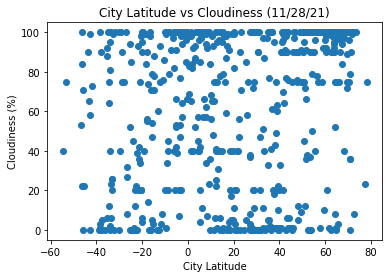

In [47]:
plt.scatter(weat_df.iloc[:,3],weat_df.iloc[:,6])
plt.title("City Latitude vs Cloudiness (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/lat_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot
Scatter plot shows that wind speed in late November globally is generally less than 15 MPH.  There is no correlation between windiness and latitude for city selection in late November.

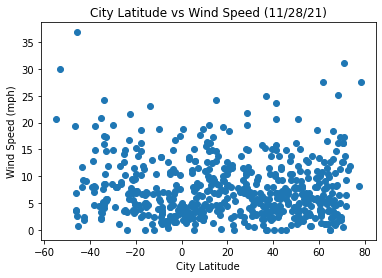

In [48]:
plt.scatter(weat_df.iloc[:,3],weat_df.iloc[:,7])
plt.title("City Latitude vs Wind Speed (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/lat_wind.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
Linear regression shows a strong correlation between latitude and maximum temperature.  Temperatures decrease as city latitude moves away from the equator.  Northern hemisphere correlation is stronger with greater temperature increases than the southern hemisphere.

In [16]:
n_lat = weat_df[weat_df['Latitude'] >= 0]

In [17]:
n_lat.shape

(392, 11)

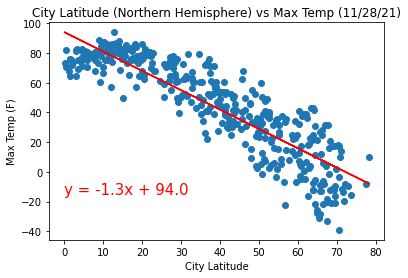

 The r-value is -0.8832657411103468


In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat.iloc[:,3],n_lat.iloc[:,4])
regress_values = n_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat.iloc[:,3],n_lat.iloc[:,4])
plt.plot(n_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.title("City Latitude (Northern Hemisphere) vs Max Temp (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('output_data/n_lat_temp.png')
plt.show()
print(f' The r-value is {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
Linear regression shows a strong correlation between latitude and maximum temperature.  Temperatures decrease as city latitude moves away from the equator.  Northern hemisphere correlation is stronger with greater temperature increases than the southern hemisphere.

In [19]:
s_lat = weat_df[weat_df['Latitude'] < 0]

In [20]:
s_lat.shape

(173, 11)

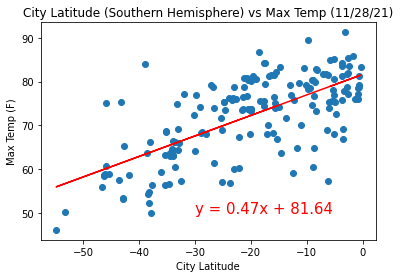

 The r-value is 0.680236658218379


In [65]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat.iloc[:,3],s_lat.iloc[:,4])
regress_values = s_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat.iloc[:,3],s_lat.iloc[:,4])
plt.plot(s_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("City Latitude (Southern Hemisphere) vs Max Temp (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('output_data/s_lat_temp.png')
plt.show()
print(f' The r-value is {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Humidity in late November was over 60% globally.  Linear regression some correlation in increasing humidity as a city' latitude increases.  Interesing, although correlation is not strong, the linear regression for cities in the southern hemisphere see decreasing humidity as a city's latitude decreases.

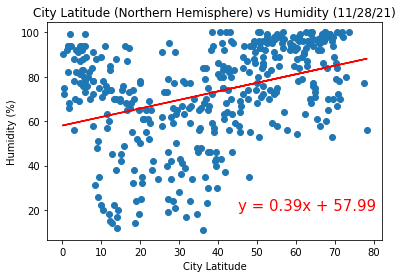

 The r-value is 0.3691980331414356


In [51]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat.iloc[:,3],n_lat.iloc[:,5])
regress_values = n_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat.iloc[:,3],n_lat.iloc[:,5])
plt.plot(n_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("City Latitude (Northern Hemisphere) vs Humidity (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/n_lat_humd.png')
plt.show()
print(f' The r-value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Humidity in late November was over 60% globally.  Linear regression some correlation in increasing humidity as a city' latitude increases.  Interesing, although correlation is not strong, the linear regression for cities in the southern hemisphere see decreasing humidity as a city's latitude decreases.

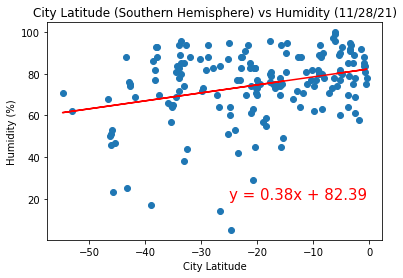

 The r-value is 0.3081087831605713


In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat.iloc[:,3],s_lat.iloc[:,5])
regress_values = s_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat.iloc[:,3],s_lat.iloc[:,5])
plt.plot(s_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.title("City Latitude (Southern Hemisphere) vs Humidity (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/s_lat_humd.png')
plt.show()
print(f' The r-value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Linear regression for cloudiness and humidity are similar.  Although not highly correlated to latitude, this does suggest there is a relationship  related between humidity and cloudiness.

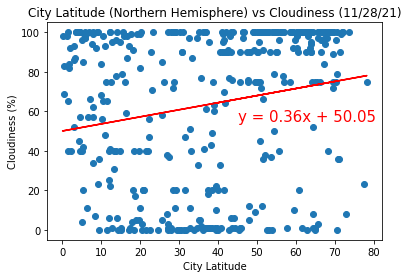

 The r-value is 0.19852034528612245


In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat.iloc[:,3],n_lat.iloc[:,6])
regress_values = n_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat.iloc[:,3],n_lat.iloc[:,6])
plt.plot(n_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="red")
plt.title("City Latitude (Northern Hemisphere) vs Cloudiness (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/n_lat_cloud.png')
plt.show()
print(f' The r-value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
Linear regression for cloudiness and humidity are similar.  Although not highly correlated to latitude, this does suggest there is a relationship  related between humidity and cloudiness.

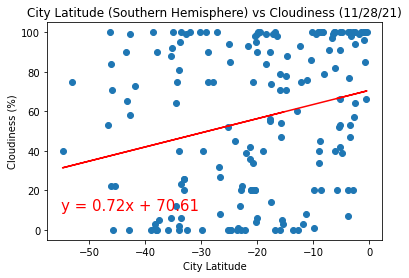

 The r-value is 0.2532572434044452


In [54]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat.iloc[:,3],s_lat.iloc[:,6])
regress_values = s_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat.iloc[:,3],s_lat.iloc[:,6])
plt.plot(s_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title("City Latitude (Southern Hemisphere) vs Cloudiness (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/s_lat_cloud.png')
plt.show()
print(f' The r-value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Wind Speed and latitude do not appear to have a relationship other then wind speed hs been generally calm globally in across city latitudes and generally under 8 MPH in the northern hemisphere.  The southern hemisphere cities show more variance and linear regression suggest increasing wind speed as cities move away from the equator.

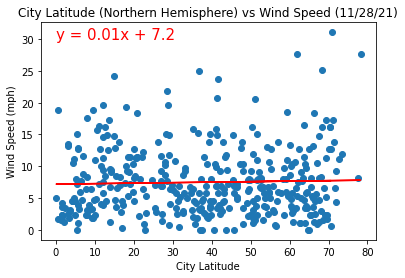

 The r-value is 0.03144268007508223


In [55]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat.iloc[:,3],n_lat.iloc[:,7])
regress_values = n_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(n_lat.iloc[:,3],n_lat.iloc[:,7])
plt.plot(n_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("City Latitude (Northern Hemisphere) vs Wind Speed (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/n_lat_wind.png')
plt.show()
print(f' The r-value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
Wind Speed and latitude do not appear to have a relationship other then wind speed hs been generally calm globally in across city latitudes and generally under 8 MPH in the northern hemisphere.  The southern hemisphere cities show more variance and linear regression suggest increasing wind speed as cities move away from the equator.

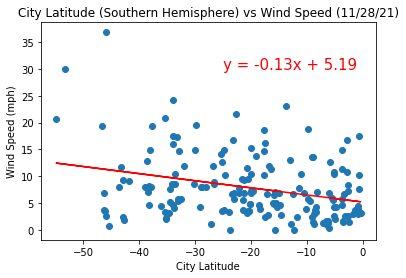

 The r-value is -0.2963806464356432


In [56]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat.iloc[:,3],s_lat.iloc[:,7])
regress_values = s_lat.iloc[:,3] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(s_lat.iloc[:,3],s_lat.iloc[:,7])
plt.plot(s_lat.iloc[:,3],regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.title("City Latitude (Southern Hemisphere) vs Wind Speed (11/28/21)")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/s_lat_wind.png')
plt.show()
print(f' The r-value is {rvalue}')